<a href="https://colab.research.google.com/github/cr0wley-zz/Embeddings/blob/main/CBOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports
The following packages are used:
1. numpy
2. tensorflow
3. matplotlib
4. tqdm

In [81]:
import numpy as np
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

# Data
Due to the fact that we want a minimal implementation of CBOW we will use a small corpus.

In [82]:
data = """
My name is Devjyoti. Your name is Aritra. Aritra loves football.
Aritra also loves movies. Devjyoti only loves movies. Aritra likes western movies.
Devjyoti likes eastern movies. Aritra plays cricket. Devjyoti plays ludo.
Aritra can bowl very well. Devjyoti hates cricket.
"""

In [83]:
# Converts the data into tokens
tokenized_text = tf.keras.preprocessing.text.text_to_word_sequence(data)
tokenized_text_size = len(tokenized_text)
# Creates a vocab of unique words
vocab = sorted(set(tokenized_text))
vocab_size = len(vocab)
print('Vocab Size: {}'.format(len(vocab)))

Vocab Size: 22


In [84]:
def check_in_vocab(word:str, vocab:list) -> bool:
  """Checks whether a word is in the vocab

  Arguments:
    word (str): The word to check
  
  Returns:
    bool: Returns whether the word is in the vocab or not
  """
  return word in vocab

In [85]:
print(check_in_vocab("devjyoti", vocab))

True


In [89]:
# Map the vocab words to individual indices
vocab_to_ix = {c:ix for ix,c in enumerate(vocab)}
# Map the indices to the words in vocab
ix_to_vocab = np.array(vocab)
# Convert the data into numbers
text_as_int = np.array([vocab_to_ix[c] for c in tokenized_text])

# Model parameters

In [92]:
EMBEDDING_SIZE = 2
WINDOW_SIZE = 5
opt = tf.optimizers.Adam()
iterations = 1000
# Here the word vectors are represented as row
context_vector =  tf.Variable(np.random.rand(vocab_size, EMBEDDING_SIZE))
center_vector = tf.Variable(np.random.rand(vocab_size, EMBEDDING_SIZE))

# Implemetation
context_vector = (vocab x embedding)
center_vector = (vocab x embedding)

$w_{-2}$, $w_{-1}$, $w_0$, $w_1$, $w_2$

Context words = {$w_{-2}$, $w_{-1}$, $w_1$, $w_2$} [FIXED]

Center word =  $w_0$ [VARIABLE]

after averaging all the context word vectors = $w_{avg}$ -> $u_{avg}$

$\boxed{u_{avg} * v_{j}; j=0...V}$

In [91]:
def train_step(indices, loss_list):
  """The training step

  Arguments:
    indices (list): The indices of the vocab in the window
  """
  with tf.GradientTape() as tape:
    # Context
    u_avg = 0
    for count,index in enumerate(indices):
      if count != WINDOW_SIZE//2:
        u_avg += context_vector[index,:]
    u_avg /= WINDOW_SIZE-1
    # Center
    output = tf.matmul(center_vector, tf.expand_dims(u_avg ,1))
    soft_out = tf.nn.softmax(output, axis=0)
    loss = soft_out[indices[WINDOW_SIZE//2]]
    log_loss = -tf.math.log(loss)
  loss_list.append(log_loss.numpy())
  grad = tape.gradient(log_loss, [context_vector, center_vector])
  opt.apply_gradients(zip(grad, [context_vector, center_vector]))

In [93]:
loss_list = []
for iter in tqdm(range(iterations)):
  # Creation of window
  for start in range(tokenized_text_size-WINDOW_SIZE):
    indices = text_as_int[start:start+WINDOW_SIZE] 
    train_step(indices, loss_list)

100%|██████████| 1000/1000 [02:47<00:00,  5.98it/s]


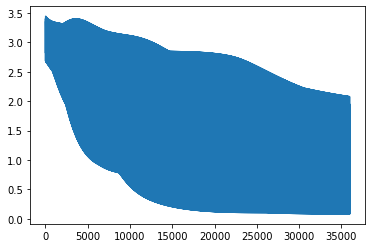

In [94]:
plt.plot(loss_list)

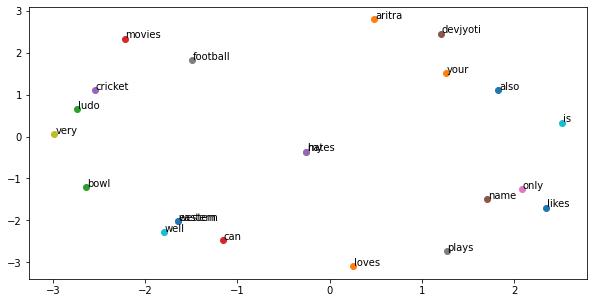

In [95]:
center_vector.numpy().shape
plt.figure(figsize=(10,5))
count = 0
for i,j in center_vector.numpy():
  plt.scatter(i,j)
  plt.text( i+0.01, j+0.01, ix_to_vocab[count])
  count += 1
plt.show()

In [ ]:
# EMBEDDING
word1 = 'aritra'
i = vocab_to_ix[word1]
center_embed_i = context_vector[i]

word2 = 'loves'
j = vocab_to_ix[word2]
center_embed_j = context_vector[j]

distance = center_embed_i - center_embed_j

min = []
for i in range(vocab_size):
  d = tf.norm(distance-context_vector[i], ord='euclidean')
  min.append(d.numpy())

index = np.argmin(min)
word3 = ix_to_vocab[index]
print('{word1} {word2} {word3}'.format(word1=word1, word2=word2, word3=word3))

aritra loves my
